# Assignment 03

## Plotting the input data

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


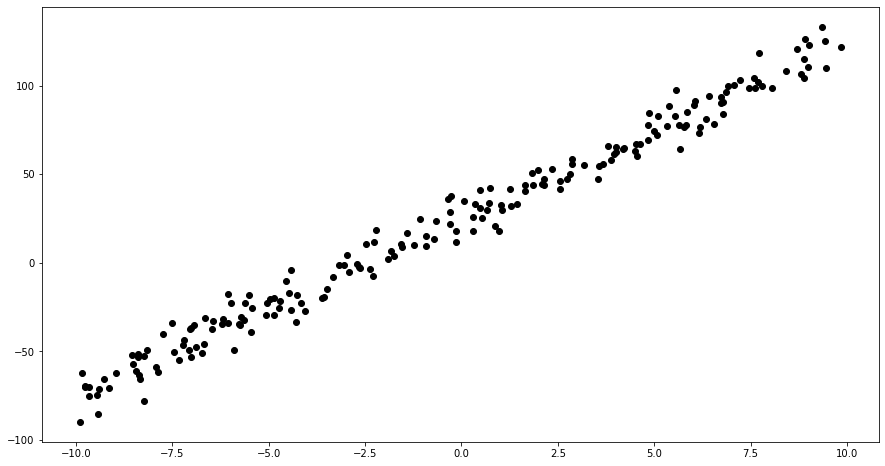

In [1]:
!pip install tqdm

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

# split data
x_data = data[:, :1]
y_data = data[:, 1:]

plt.figure(figsize=(15, 8))
plt.scatter(x_data, y_data, color='black')
plt.show()

read $ m $ point pairs $ \{ (x^{(i)}, y^{(i)}) \}_{i = 1}^m $ from data.csv

In [2]:
from tqdm import tqdm

# Declare linear model
class Linear:
    r'''
    Linear model for linear regression
    Initial parameter is -30, -30
    '''
    weight = np.asarray([-30])
    bias = np.asarray([-30])

    def __call__(self, x: np.ndarray):
        return self.weight * x + self.bias
    
def MSELoss(pred: np.ndarray, label: np.ndarray):
    return ((pred - label) ** 2).mean(dtype=np.float64)/2

epoch = 1000000
learning_rate = 1e-2

model = Linear()

losses = []
weights = []
biases = []

for step in tqdm(range(1, epoch+ 1)):
    # MSELoss
    loss: np.ndarray = MSELoss(model(x_data), y_data)
    
    # Save losses and parameters
    losses += [loss.item()]
    weights += [model.weight.item()]
    biases += [model.bias.item()]
        
    # Backpropagation Loss
    d_bias = (model(x_data) - y_data).mean()
    d_weight = ((model(x_data) - y_data) * x_data).mean()
    
    # Gradient Descent Algorithm
    temp_bias = model.bias - learning_rate * d_bias
    temp_weight = model.weight - learning_rate * d_weight
    
    # Update parameter
    model.bias = temp_bias
    model.weight = temp_weight
    
    if step % 300000 == 0:
        learning_rate = learning_rate * 0.5
    
losses = np.asarray(losses)
weights = np.asarray(weights)
biases = np.asarray(biases)


100%|█████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:39<00:00, 25000.87it/s]


### Linear Model
$ y = \theta_0 + \theta_1 * x$  
initial parameter is $\theta_0 = -30, \theta_1 = -30$

### Objective function: MSELoss  
$ J(\theta) = \frac{1}{2 m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $  

### Gradient Descent Algorithm  
$ \theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) $  
$ \theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)} $

initial learning rate is 1e-2 and decay by 0.5 every 300000 epoch

## linear regression result

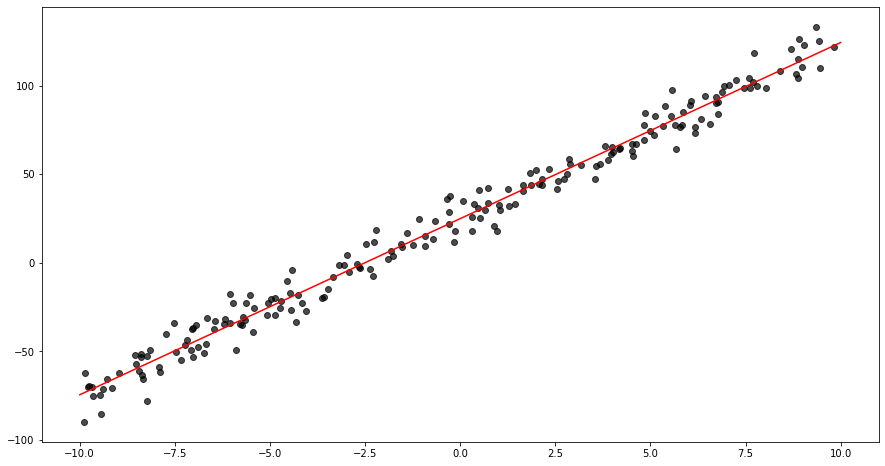

In [3]:
plt.figure(figsize=(15, 8))
plt.scatter(x_data, y_data, color='black', alpha=0.7)
plt.plot([-10, 10], model.bias + model.weight * [-10, 10], 'r')
plt.show()

## Plot the energy surface

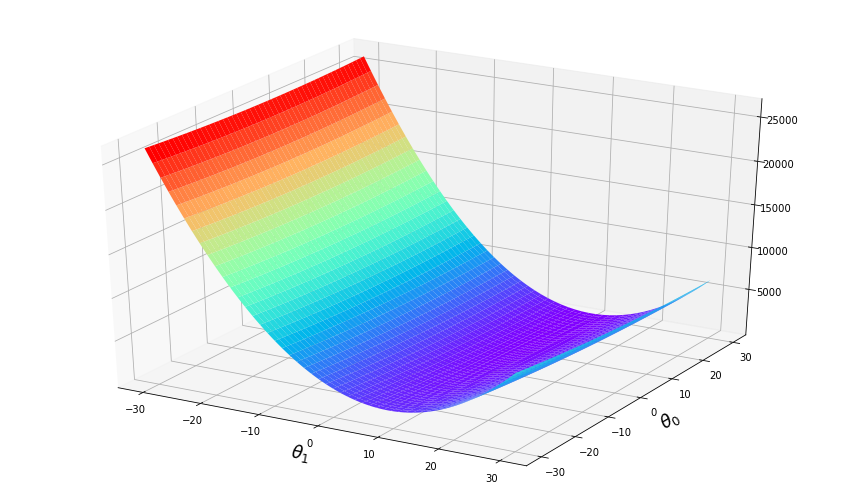

In [4]:
# theta from -30 and 30 step 0.1
theta_0 = np.arange(-30, 30, 0.1)
theta_1 = np.arange(-30, 30, 0.1) 

# calulate MSELoss surface
energy = np.asarray([[MSELoss(t_0 + t_1 * x_data, y_data) for t_0 in theta_0] for t_1 in theta_1])

theta_0, theta_1 = np.meshgrid(theta_0, theta_1)

plt.figure(figsize=(15, 9))
ax = plt.axes(projection='3d')
ax.plot_surface(theta_1, theta_0, energy, alpha=1,cmap='rainbow')

ax.set_xlabel(r'$\theta_1$', fontsize='xx-large')
ax.set_ylabel(r'$\theta_0$', fontsize='xx-large')

plt.show()

Plot energy surface $ (\theta_0, \theta_1, J(\theta_0, \theta_1)) $ with the range of variables $ \theta_0 = [-30, 30] $ and $ \theta_1 = [-30, 30] $  
$ J(\theta_0, \theta_1)) = \frac{1}{2 m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $  

## Plot the gradient descent path on the energy surface

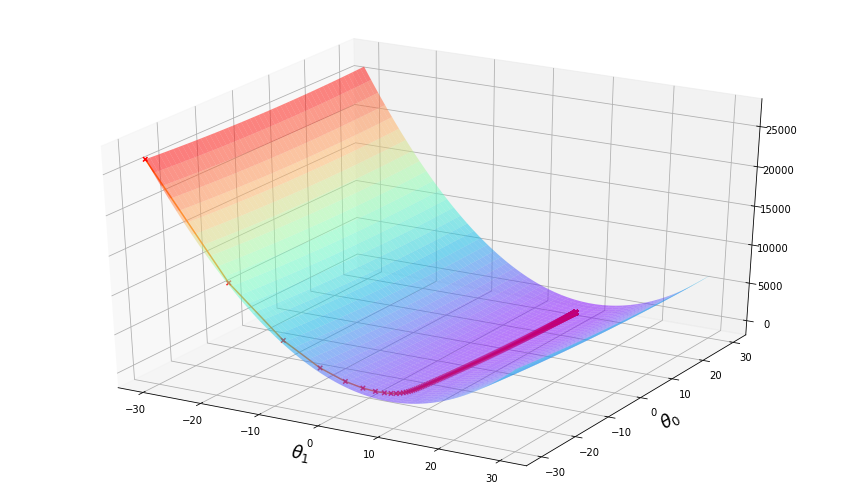

In [5]:
plt.figure(figsize=(15, 9))
ax = plt.axes(projection='3d')
ax.plot_surface(theta_1, theta_0, energy, alpha=0.5,cmap='rainbow')
ax.scatter(weights, biases, losses, marker='x', color='red')
ax.plot(weights, biases, losses)
ax.set_xlabel(r'$\theta_1$', fontsize='xx-large')
ax.set_ylabel(r'$\theta_0$', fontsize='xx-large')

plt.show()

plot the energy value with the updated variables $ \theta_0^{(t)} $ and $ \theta_1^{(t)} $ at each gradient descent step on the energy surface